# SIR model

#### This script is for an SIR model to simulate an epidemic over time. The model consists of three differential equations describing the rate of change of variables over time. The 3 variables are:
#### u[1] = S: Susceptible population
#### u[2] = I: Infected population
#### u[3] = R: Recovered population

In [ ]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

In [1]:
using DifferentialEquations
using Plots

### Define parameters

In [57]:
r = 2;         # number of contacts per unit time
beta = 5e-9    # Prob. of disease transmission
gamma = 0.12    # Recovery rate (Try 0.07)
delta = 0     # Loss of immunity (1/60)
N = 6e7      # Population size N=S+I+R

6.0e7

### Define differential equations

In [58]:
function SIR!(du,u,p,t)
    du[1] = -r.*beta.*u[1].*u[2] + delta.*u[3]
    du[2] = r.*beta.*u[1].*u[2] - gamma.*u[2]
    du[3] = gamma.*u[2] - delta.*u[3]
end

SIR! (generic function with 1 method)

In [59]:
u0 = [N,10,0]                   #Initial conditions
p = [r,beta,gamma,delta]
tspan = (0.0,300.0)               #Time course

(0.0, 300.0)

### Solve ODE

In [60]:
prob = ODEProblem(SIR!,u0,tspan,p)
sol = solve(prob);

### Plot solutions

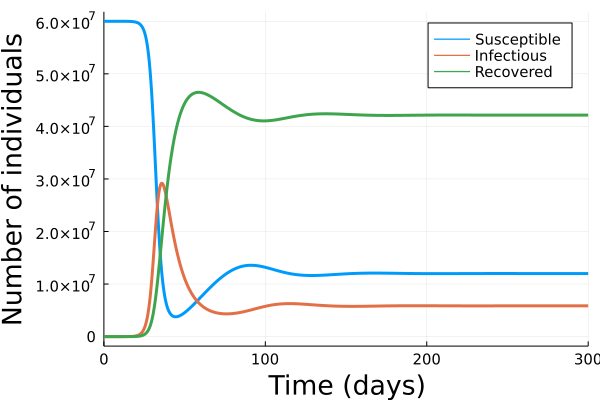

In [75]:
plot(sol,lw=3,label=["Susceptible" "Infectious" "Recovered"])
plot!(xlabel="Time (days)", ylabel="Number of individuals", 
    xtickfontsize=10,ytickfontsize=10,xguidefontsize=18,yguidefontsize=18,legendfontsize=10,
    fmt = :png)